In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('./resources/csv/8-weight-height.csv')
df.head()

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796


Text(0, 0.5, 'Height')

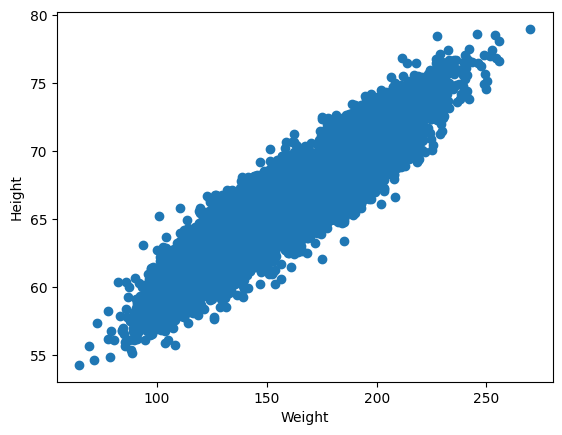

In [ ]:
## Scatter plot for visulization
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
## Finding Corelation between weight and Height
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


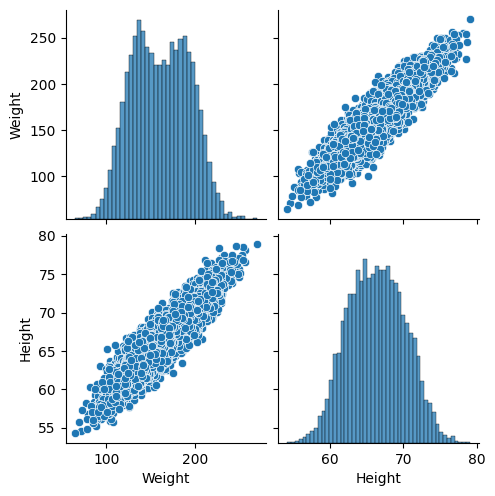

In [10]:
## seaborn visulization of feature with each other
sns.pairplot(data=df)

In [13]:
## Step1: Divide features in to dependant and independent features
## We are not using X=df['Weight'] as type ll be series not a Dataframe
## Series means single record
## independent features should be data frame or 2 dimesional array
X=df[['Weight']] 
np.array(X).shape ## will get information regarding column also i.e. (10000, 1), 1000 rows $ 1 column

## np.array(df['Weight']).shape ## will not give information regarding column i.e. (10000, ), 1000 rows $ 1 column


(10000, 1)

In [14]:
## output or dependant feature can be a series or 1 dimensional array because  dependat feature we will have only 1 column value
y=df['Height'] 

In [15]:
## Train Test Split
from sklearn.model_selection import train_test_split

## test_size=0.25 means 25% will be the test data and 75% ll be train data
#  random_state=42 means that if on same data set is somone use 42 value it ll pick the same random values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [17]:
X_train.shape

(2500, 1)

In [18]:
## Standardization 
# Data can be of different different Unit, here weight can be having big value as compared to height
# so the issue is when we try to reach global minima weight ll take more time as its value is big which can be a problem or say not a suitable solution
# So to resolve this we take all indepedant feature and apply simple formula i.e. Z score
# And this formula will basically be converting all your values with mean is equal to zero and standard deviation equal to one.

from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.04659659],
       [ 1.34251968],
       [-0.34628208],
       ...,
       [-0.13835268],
       [ 0.56699643],
       [-0.33884025]])

In [22]:
## For test data ll use scaler.transform as  that basically means that we are going to use the training data set mean and standard deviation and use it in here i.e. in test.
## If we use fit transform then again mean or standard deviation will get calculated for this data and we don't want that.
# we do this? Because there is a important concept which is called as data leakage. 
# i.e I don't want my training data to know any info about test data.

X_test = scaler.transform(X_test)
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]])

In [23]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [26]:
# n_jobs = -1 ll use all the processors that are available it ll run regression on them
regression = LinearRegression(n_jobs=-1) 

In [27]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [30]:
## get the coefficient or slope i.e. beta1 or m, in equation y= beta0+ beta1*x or say y= mx+c
## it has only 1 value as there is only 1 independant feature
print("Coefficient or slope",regression.coef_)
# Let's say one unit movement in the weight value.
# That leads to 3.5520765(Coefficient) unit movements in the height value.

print("Intercept",regression.intercept_)
# Intercept says that when value of X = 0 i.e. when value of weight is 0 here
# then the value of y ll be Intercept 66.34834766149207

Coefficient or slope [3.5520765]
Intercept 66.34834766149207


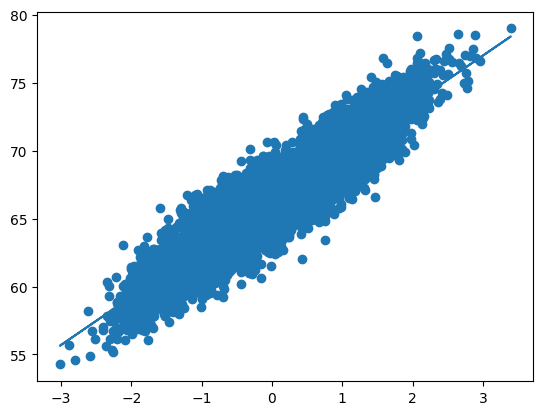

In [35]:
## See the best fit line
## plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train)) ## best fit line
# as the scatter plot points are close to the best fit line we can say that error is very less


## Prediction for Test data
Equation y = mx+c
1. prediction height output (y)=  coef_*(X) + intercept
2. y_predict_test_data = 3.5520765 *(X_test) + 66.34834766149207


In [37]:
## Now prediction for test data
y_predict =  regression.predict(X_test)
print(y_predict)


[67.66673256 70.11227616 67.3452232  ... 62.20315456 66.80250232
 66.55658642]


In [38]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
root_mean_square_error = np.sqrt(mse)
print(mse)
print(mae)
print(root_mean_square_error)

2.1245002931280457
1.1618686241050298
1.4575665655907608


#### Now the next thing that we are going to use is something called as R square.


### R Square
R^2 = 1- SSR/SST
R^2 = coefficient of determincation
SST = sum of squares of residuals
SST = total sum of squares

In [40]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(y_test, y_predict)
score ## 0.857428881104187 this is good score 

0.857428881104187

### Lets try to do the same with OLS Lineat Regression Techniques

In [45]:
import statsmodels.api as sm

In [47]:
model = sm.OLS(y_train, X_train).fit()

In [49]:
predict = model.predict(X_test)
print(predict)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [50]:
print(model.summary()) ## You can check that coef is 3.5521 i.e. same as above

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                    3.63e-06
Time:                        15:42:25   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
## Predict for new custom data
regression.predict([[60]])

## Answer is 279.47293789 which is wrong
## We missed a very important step which is called as standardization.

array([279.47293789])

In [58]:
## Predict for new custom data with standardization
regression.predict(scaler.transform([[60]]))

array([279.47293789])